In [2]:
import keras as kr
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tqdm import tqdm
from PIL import Image
import os
import pandas as pd
import numpy as np

In [3]:
# Directories for training and validation datasets
Train_dir = 'images/train'
Test_dir = 'images/validation'

In [4]:
# Function to create dataframe from image directories
def Createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        label_dir = os.path.join(dir, label)
        if os.path.isdir(label_dir):
            for imagename in os.listdir(label_dir):
                image_paths.append(os.path.join(label_dir, imagename))
                labels.append(label)
        print(label, "completed")
    return image_paths, labels


In [5]:
# Creating dataframes for train and test datasets
train = pd.DataFrame()
train['image'], train['label'] = Createdataframe(Train_dir)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [6]:

print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [7]:
train = pd.DataFrame()
train['image'], train['label'] = Createdataframe(Train_dir)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [9]:
test = pd.DataFrame()
test['image'], test['label'] = Createdataframe(Test_dir)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [10]:
print(test)

                                    image     label
0       images/validation\angry\10052.jpg     angry
1       images/validation\angry\10065.jpg     angry
2       images/validation\angry\10079.jpg     angry
3       images/validation\angry\10095.jpg     angry
4       images/validation\angry\10121.jpg     angry
...                                   ...       ...
7061  images/validation\surprise\9806.jpg  surprise
7062  images/validation\surprise\9830.jpg  surprise
7063  images/validation\surprise\9853.jpg  surprise
7064  images/validation\surprise\9878.jpg  surprise
7065   images/validation\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [12]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = Image.open(image).convert('L')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [13]:
train_features = extract_features(train['image'])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28821/28821 [00:32<00:00, 894.63it/s]


In [14]:
test_features = extract_features(test['image'])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7066/7066 [00:06<00:00, 1176.47it/s]


In [15]:
# Normalize the pixel values

x_train = train_features/255.0
x_test = test_features/255.0

In [16]:
# Convert labels to categorical
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [18]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [19]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [22]:
#CNN Model
model = Sequential()

model.add(Input(shape=(48, 48, 1)))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(7, activation='softmax'))


In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [24]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 


Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.2422 - loss: 1.8349 - val_accuracy: 0.3316 - val_loss: 1.7108
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - accuracy: 0.3245 - loss: 1.6781 - val_accuracy: 0.4291 - val_loss: 1.4740
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 379s 1s/step - accuracy: 0.4177 - loss: 1.4983 - val_accuracy: 0.4820 - val_loss: 1.3710
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - accuracy: 0.4591 - loss: 1.4120 - val_accuracy: 0.5100 - val_loss: 1.2795
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 336s 1s/step - accuracy: 0.4889 - loss: 1.3339 - val_accuracy: 0.5170 - val_loss: 1.2470
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - accuracy: 0.5084 - loss: 1.2986 - val_accuracy: 0.5453 - val_loss: 1.1956
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 334s 1s/step - accuracy: 0.5215 - loss: 1.2495 - val_accuracy: 0.5579 - val_loss: 1.1684
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 334s 1s/step - accuracy: 0.5353 - loss: 1.2140 - 

KeyboardInterrupt: 

In [26]:
# Save model architecture to JSON file
model_json = model.to_json()
with open("emotiondetector.json", 'w') as json_file:
    json_file.write(model_json)

# Save the entire model using the native Keras format
model.save("emotiondetector.keras")


In [28]:
from tensorflow.keras.utils import load_img


In [29]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [30]:
def ef(image):
    img = Image.open(image).convert('L')    
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [31]:
image = 'images\\train\\angry\\117.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
model prediction is  angry


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
model prediction is  sad


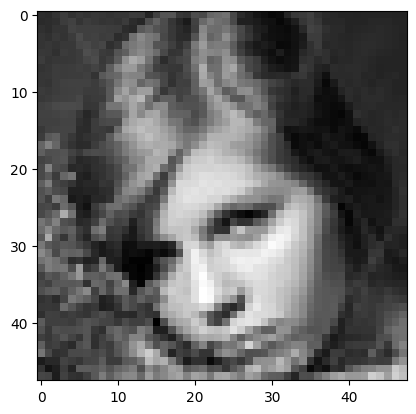

In [33]:
image = 'images\\train\\sad\\35742.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
model prediction is  fear


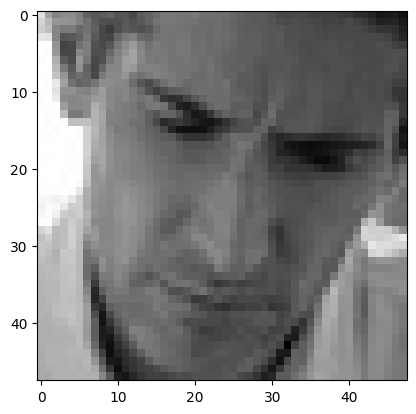

In [34]:
image = 'images\\train\\fear\\18496.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
model prediction is  angry


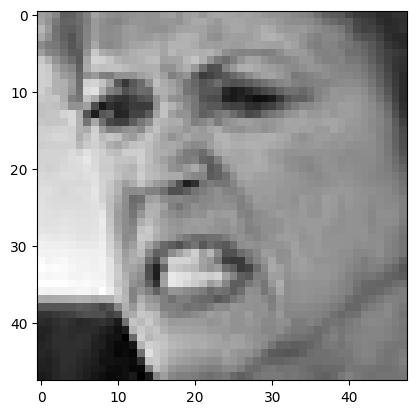

In [35]:
image = 'images\\validation\\angry\\1575.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
model prediction is  surprise


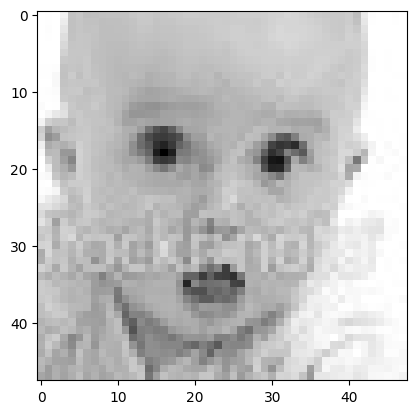

In [36]:
image = 'images\\validation\\surprise\\1864.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
model prediction is  fear


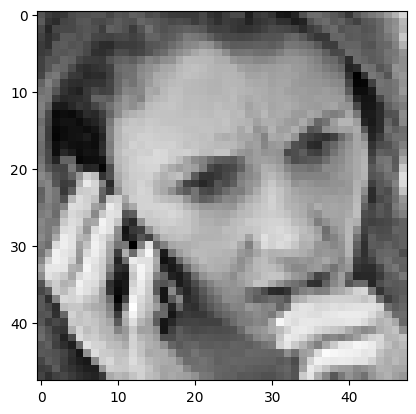

In [37]:
image = 'images\\validation\\fear\\258.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
model prediction is  sad


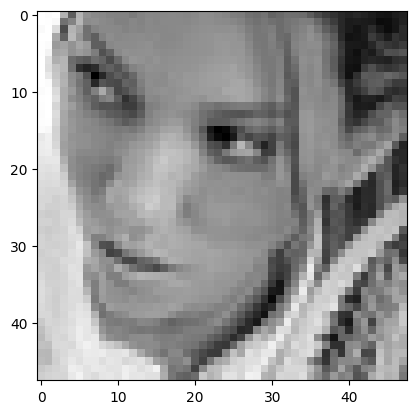

In [38]:
image = 'images\\validation\\neutral\\551.jpg'
print("original image is of neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of Disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
model prediction is  disgust


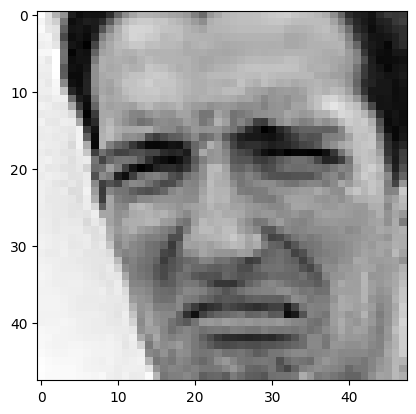

In [39]:
image = 'images\\validation\\Disgust\\11639.jpg'
print("original image is of Disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')